In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the Alpaca api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST()
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [4]:
# Test if API keys are properly loaded in by using 'type'-function and see if it returns string

type(os.getenv("ALPACA_API_KEY"))
type(os.getenv("ALPACA_SECRET_KEY"))

str

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [46]:
# YOUR CODE HERE

# Set the list of tickers
list_of_tickers = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes of 1 year, between now and 365 days ago.
end_date = pd.Timestamp('2020-04-01', tz='America/New_York').isoformat()
start_date = pd.Timestamp('2010-01-01', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
alpaca_df = api.get_barset(
    list_of_tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

alpaca_df.head()

AGG                                         SPY  \
                             open    high      low    close    volume    open   
time                                                                            
2010-01-04 00:00:00-05:00  103.27  103.41  103.150  103.250  937125.0  112.37   
2010-01-05 00:00:00-05:00  103.62  103.82  103.520  103.740  466104.0  113.26   
2010-01-06 00:00:00-05:00  103.82  103.82  103.410  103.690  661487.0  113.51   
2010-01-07 00:00:00-05:00  103.66  103.71  103.472  103.580  688927.0  113.51   
2010-01-08 00:00:00-05:00  103.79  103.87  103.540  103.706  383859.0  113.88   

                                                              
                             high     low   close     volume  
time                                                          
2010-01-04 00:00:00-05:00  113.39  112.33  113.32   94012745  
2010-01-05 00:00:00-05:00  113.68  112.85  113.63   96655357  
2010-01-06 00:00:00-05:00  113.99  113.43  113.74   95283731  
2010-01-07 00:00:00-05:00  114.33  113.18  114.20  106416501  
2010-01-08 00:00:00-05:00  114.61  113.66  114.57   95322019

In [47]:
# Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
alpaca_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
alpaca_df.head()

,AGG,SPY
,close,close
time,,
2010-01-04 00:00:00-05:00,103.250,113.32
2010-01-05 00:00:00-05:00,103.740,113.63
2010-01-06 00:00:00-05:00,103.690,113.74
2010-01-07 00:00:00-05:00,103.580,114.20
2010-01-08 00:00:00-05:00,103.706,114.57


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [48]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE

# Use the `pct_change` function to calculate daily returns of `AGG` and `SPY`.
daily_returns = alpaca_df.pct_change()
daily_returns.head()

# Use the `mean` function to calculate the mean of daily returns for `TLSA` and `SPHD`, respectively
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']

In [49]:
# Calculate volatility
# YOUR CODE HERE

# Use the `std` function to calculate the standard deviation of daily returns for `AGG` and `SPY`
std_dev_daily_return_agg = daily_returns.std()['AGG']['close']
std_dev_daily_return_spy = daily_returns.std()['SPY']['close']

print(f"The standard deviation of daily returns for AGG is {std_dev_daily_return_agg}")
print(f"The standard deviation of daily returns for SPY is {std_dev_daily_return_spy}")

The standard deviation of daily returns for AGG is 0.0026406275549571215
The standard deviation of daily returns for SPY is 0.010737755913862473


In [50]:
# Save the last day's closing price
# YOUR CODE HERE

agg_last_price = alpaca_df['AGG']['close'][-1]
spy_last_price = alpaca_df['SPY']['close'][-1]

In [51]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
# monte_carlo = pd.DataFrame()
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [52]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    
    # YOUR CODE HERE
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    simulated_agg_prices = [agg_last_price]
    simulated_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 * 30 days
    for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_dev_daily_return_agg))
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_dev_daily_return_spy))
        
        # Append the simulated price to the list
        simulated_agg_prices.append(simulated_agg_price)
        simulated_spy_prices.append(simulated_spy_price)
        
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["AGG prices"] = pd.Series(simulated_agg_prices)
    simulated_price_df["SPY prices"] = pd.Series(simulated_spy_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.4, 0.6]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[x] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

In [53]:
# Visualize the Simulation
# YOUR CODE HERE
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008033,0.990065,1.008430,0.998415,0.997896,0.997374,1.009874,0.993683,1.003525,0.997568,...,0.992251,0.998580,1.002586,1.001981,0.997404,1.017352,0.992692,1.013033,1.002200,0.998897
2,1.011086,0.992086,1.007194,1.004822,0.988735,0.988446,1.015873,0.994522,1.001396,1.000764,...,1.001384,0.999463,0.996365,0.997400,1.003737,1.011562,0.992640,1.016089,1.012706,0.993668
3,1.008851,0.992629,1.006586,1.012788,0.985424,0.986358,1.008458,1.005917,0.989461,0.999448,...,1.007947,0.999518,0.991391,0.996454,1.005098,1.008594,0.994152,1.020339,1.021643,0.986494
4,1.012948,0.983087,1.002609,1.002582,0.982777,0.977809,1.006387,1.004375,0.985766,0.981655,...,1.016968,0.992230,0.982597,0.991523,1.000322,1.011097,1.000924,1.025564,1.013924,0.979269
5,1.009945,0.979142,1.001214,0.998849,0.988513,0.977934,1.006768,1.014222,0.992701,0.988094,...,1.020601,0.992434,0.988209,0.995929,0.998783,1.004518,0.997115,1.018704,1.010178,0.984336
6,1.001960,0.976287,0.995299,1.006526,0.983685,0.980640,1.000964,1.003302,0.984345,0.993650,...,1.027659,0.999890,0.985661,1.004292,1.005915,1.000380,0.992810,1.015560,1.014624,0.986469
7,1.004777,0.980351,0.993909,1.010599,0.993433,0.976464,1.000213,1.006415,0.999035,0.989328,...,1.015396,1.008417,0.980100,1.002991,1.018092,0.989676,0.999119,1.025092,1.018390,0.992758
8,1.005272,0.975942,0.995088,1.007166,0.992246,0.992869,1.007225,1.009369,1.001200,0.992907,...,1.014675,1.002989,0.980565,0.999607,1.015737,0.989696,1.000031,1.028235,1.020296,0.986099
9,1.016443,0.980934,0.998626,1.008425,1.001962,1.006473,1.004523,1.011981,0.998554,0.980064,...,1.009545,1.007334,0.977659,0.999168,1.016224,0.987636,1.004410,1.044591,1.030854,0.982140


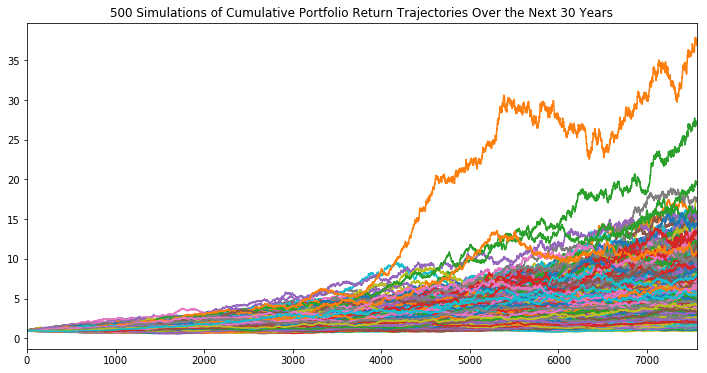

In [54]:
plot_title = f"{x+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
monte_carlo_plot = portfolio_cumulative_returns.plot(legend=False, title=plot_title, figsize=(12, 6))
monte_carlo_plot

In [55]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE

ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns

0      13.315764
1       2.378726
2       4.779127
3       4.064269
4       8.986192
5       2.286688
6       2.992548
7       5.456332
8       2.501974
9       9.594705
10      4.460177
11      6.142600
12      7.306113
13      7.438615
14      4.175701
15      4.318486
16      1.911559
17     13.608071
18     13.231157
19      5.961480
20      2.990767
21      8.225388
22      2.663607
23      8.550827
24      5.265268
25      2.972628
26      6.238541
27      7.762634
28      9.428837
29     15.247373
         ...    
470    14.527886
471    37.064720
472     5.568492
473     4.034186
474     1.357103
475     6.634752
476     3.865749
477     2.242348
478     2.595591
479     8.122970
480     2.698638
481    10.816423
482     3.165117
483    13.219588
484     3.372455
485     4.169766
486     6.384670
487     2.434444
488     2.635051
489     5.869282
490     5.029483
491     5.570658
492     5.073203
493     2.119446
494     2.294099
495     3.319931
496     6.617160
497     4.5817

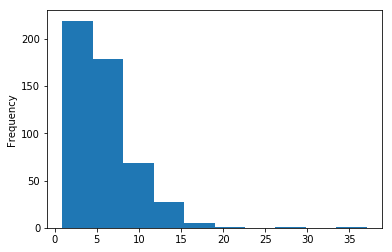

In [56]:
# plo frequency distribution of ending cumulative returns

ending_cumulative_returns.plot(kind='hist', bins=10)

In [57]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE

# simulation is for 30 years, so cumulative returns at 20 years needs to iloc for 5041 

ending_cumulative_returns20yr = portfolio_cumulative_returns.iloc[5041, :]
ending_cumulative_returns20yr

0       4.935505
1       1.420304
2       3.333905
3       4.604858
4       4.883674
5       1.876058
6       1.499575
7       3.401774
8       2.335610
9       4.304427
10      3.860534
11      5.245303
12      4.476978
13      4.232908
14      3.514534
15      2.928606
16      1.288169
17      6.777038
18      5.924846
19      4.480154
20      2.206369
21      3.686388
22      1.914387
23      3.954718
24      1.987407
25      3.373323
26      3.689134
27      3.008454
28      5.053735
29      5.882443
         ...    
470     3.983128
471    22.097249
472     3.620952
473     2.736199
474     1.120869
475     5.296348
476     2.741770
477     1.617748
478     1.365983
479     4.954775
480     1.795503
481    10.200154
482     2.145774
483     4.369697
484     1.917183
485     2.653785
486     6.045416
487     1.966003
488     1.671046
489     3.711127
490     2.875693
491     2.649188
492     2.168078
493     1.569569
494     2.110649
495     2.406507
496     2.809163
497     3.7440

In [58]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE

# Use the `quantile` function to calculate the 90% confidence interval for simulated ending prices
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05     1.859390
0.95    12.844521
Name: 7560, dtype: float64

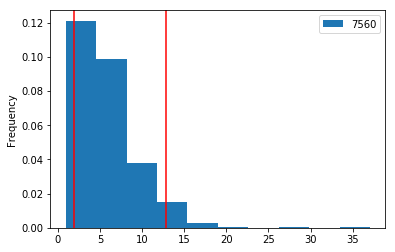

In [59]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist',legend=True, density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [60]:
# YOUR CODE HERE
percentile_10 = np.percentile(ending_cumulative_returns, 10)
percentile_50 = np.percentile(ending_cumulative_returns, 50)
percentile_90 = np.percentile(ending_cumulative_returns, 90)
print(percentile_10)
print(percentile_50)
print(percentile_90)

2.2850046962906774
5.073218772701569
10.413052828020756


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [61]:
# YOUR CODE HERE

expected_portfolio_return10 = 20000 + (20000 * percentile_10)
expected_portfolio_return50 = 20000 + (20000 * percentile_50)
expected_portfolio_return90 = 20000 + (20000 * percentile_90)

print(expected_portfolio_return10)
print(expected_portfolio_return50)
print(expected_portfolio_return90)

65700.09392581355
121464.37545403138
228261.05656041513


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [62]:
# YOUR CODE HERE

projected_yearly_income = 6085  #(see account summary exercise)
retirement_withdraw_10 = expected_portfolio_return10 * 0.04
retirement_withdraw_10


2628.003757032542

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [63]:
# YOUR CODE HERE

expected_portfolio_return10_30k = 30000 + (30000 * percentile_10)
expected_portfolio_return50_30k = 30000 + (30000 * percentile_50)
expected_portfolio_return90_30k = 30000 + (30000 * percentile_90)

print(expected_portfolio_return10_30k)
print(expected_portfolio_return50_30k)
print(expected_portfolio_return90_30k)


98550.14088872031
182196.56318104707
342391.5848406227


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE